# Representación gráfica con Matplotlib

La representación gráfica es una de las herramientas más potentes para explorar datos, y, hoy en día, una de las tareas más importantes tanto para ingenieros como científicos. De hecho, los gráficos se usan tanto para exponer como para entender datos y para comprobar visualmente resultados calculados.

El módulo de Python más ampliamente usado para la representación gráfica es **Matplotlib** (<http://matplotlib.org/>), que será, fundamentalmente, el que usaremos en este curso. Este módulo es muy potente y posee muchísimas funcionalidades. Esta sección trata de introducir algunos de sus elementos más básicos. Para tener una idea de todas las posibilidades que ofrece este módulo, se puede visitar la *Matplotlib Gallery* (http://matplotlib.org/gallery.html).

## Objetivos

- Uso de Matplotlib en el plano y en el espacio tridimensional.
- Representación gráfica de vectores.
- Representación gráfica de curvas.
- Visualización de objetos (superficies) en el espacio tridimensional.

## Uso de Matplotlib

Para usar **Matplotlib**, necesitamos importar su módulo. Puesto que lo usaremos a partir de la interface `pyplot`, también será necesario importar `pyplot`:

In [34]:
import matplotlib as mp
import matplotlib.pyplot as plt
mp.__version__

'3.3.4'

Evidentemente para realizar cálculos numéricos de forma eficiente, será preciso importar el módulo **Numpy**. Además, para poder trabajar en modo simbólico, también importamos el módulo **Sympy**.

In [67]:
import numpy as np
import sympy as sp

Matplotlib es una librería de Python que que se puede utilizar fuera de los *Notebooks* Jupyter para representar gráficamente tanto funciones como entidades geométricas (ya sea por pantalla o para guardarlas en un fichero). Para que las representaciones gráficas aparezcan incrustadas en este documento, usaremos el comando *mágico* 
`%matplotlib inline`. Por el contrario, si es necesario interactuar con las gráficas, se puede usar la opción `%matplotlib notebook`.

In [36]:
%matplotlib inline

El tamaño de la fuente que aparece por defecto en los ejes o en el texto de las gráficas se puede modificar usando:
```python
matplotlib.rcParams.update({'font.size': 16})
```

## Representación gráfica de vectores en $\mathbb{R}^2$ y $\mathbb{R}^3$

En lo que sigue, en primer lugar, se representarán gráficamente tres vectores en $\mathbb{R}^2$, cada uno de un color diferente, y se guardará el resultado de esta visualización en un archivo de extensión `.pdf`:

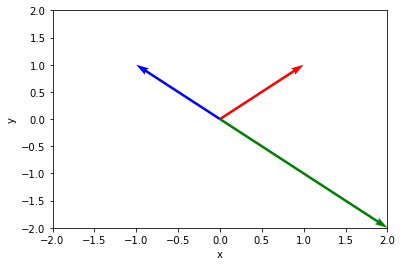

In [37]:
# Matriz con los datos de los vectores
V = np.array([[1,1],[-1,1],[2,-2]])

# Representación gráfica de vectores 2D
plt.quiver(np.array([0,0,0]), np.array([0,0,0]), V[:,0], V[:,1], color=['r','b','g'], angles='xy', scale_units='xy', scale=1)

# Definición de los límites de los ejes
plt.xlim([-2,2])
plt.ylim([-2,2])

# Etiquetas de los ejes
plt.xlabel('x')
plt.ylabel('y')

# Escritura a fichero y visualización
plt.savefig("grafica-con-vectores.pdf")
plt.show()

La representación gráfica de elementos tridimensionales debe hacerse utilizando un módulo diferente de **Matplotlib**, que es **Axes3D**. De esta manera, volveríamos a utilizar la función `quiver`:

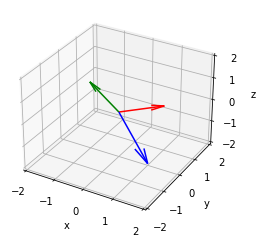

In [38]:
from mpl_toolkits.mplot3d import Axes3D

# Datos de los vectores
V = np.array([[1,1,0],[-1,0,1],[1,0,-2]])

# Inicialización de la representación 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Representación de los vectores
ax.quiver([0], [0], [0], V[:,0], V[:,1], V[:,2], color=['r','g','b','r','r','g','g','b','b'])

# Ajuste de los límites de los ejes
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])

# Etiquetas de los ejes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Usando las funciones `np.dot` y `np.cross` se puede calcular, respectivamente, el producto escalar y el producto vectorial de dos vectores.

### Ejercicio 1 
Dados los vectores $\vec{u}=(1,0,1)^t$ y $\vec{v}=(-1,2,0)^t$. Calcula y representa gráficamente el vector que resulta al proyectar $\vec{u}$ sobre $\vec{v}$.

In [17]:
# ESCRIBE AQUÍ TU CÓDIGO

### Ejercicio 2
Teniendo en cuenta los vectores anteriores, calcula y representa gráficamente el vector $\vec{u}\times\vec{v}$. 

In [18]:
# ESCRIBE AQUÍ TU CÓDIGO

### Ejercicio 3
Teniendo en cuenta los vectores anteriores y el vector $\vec{w}=(0,1,1)^t$, calcula el valor del producto mixto y representa gráficamente los vértices del paralepípedo al que se le está calculando el volumen.

In [19]:
# ESCRIBE AQUÍ TU CÓDIGO

## Representación gráfica de curvas en $\mathbb{R}^2$ y $\mathbb{R}^3$

Por simplicidad, en $\mathbb{R}^2$ nos centraremos en la representación gráfica de curvas de la forma $y=f(x)$ (es decir, gráficas de funciones reales de una variable real). Este tipo de curvas en el plano se puede definir como un conjunto de puntos de la forma:
$
\{(x,f(x)):x\in\mathbb{R}\}.
$

Generalizando en el espacio tridimensional, se tiene que una curva viene definida por tres funciones diferentes que dependen de un mismo y único parámetro $t$:

\begin{eqnarray*}
\text{Curva en }\mathbb{R}^3 &=& \{(x,y,z)\in\mathbb{R}^3:\ x=f(t),\ y=g(t),\ z=h(t)\text{ con }t\in\mathbb{R}\} \\
&=&\{(f(t),g(t),h(t)):\ t\in\mathbb{R}\}.
\end{eqnarray*}
Por ejemplo, en el caso particular de una recta que pasa por el punto $P = (a,b,c)$ y tiene vector director $\mathbf{v}=\left(v_{1},v_{2},v_{3}\right)$, se tiene:

$$
\text{Recta en }\mathbb{R}^3=\{(f(t),g(t),h(t)):\ t\in\mathbb{R}\}=\{(a + t v_{1},b + t v_{2},c + t v_{3}):\ t\in\mathbb{R}\}.
$$
Las gráficas de curvas se crean a partir de la evaluación de las funciones que las definen en un gran número de valores almacenados en un vector **Numpy**. Al usar un número suficiente de valores para el parámetro, la gráfica de la curva parecerá suave. Sin embargo, hay que entender que lo que se está representando gráficamente es una concatenación de segmentos rectos que unen los puntos resultantes de la evaluación. Por tanto, el primer paso será crear un vector de valores en los que se evaluarán las funciones utilizando el comando `np.linspace`, y, más adelante, se utilizará el comando `plt.plot` (en 2D) o en comando `plt.plot3D` (en 3D).

Por ejemplo, para representar las curvas 

$$
y = \sin(x),\qquad y=\cos(x),\qquad x\in[0,4\pi],
$$
se utilizarían los comandos correspondientes como sigue:

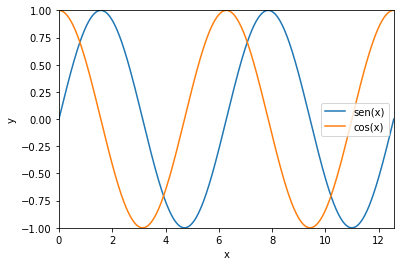

In [94]:
# Creación de los valores en donde se evalúan las funciones
xx = np.linspace(0, 4*np.pi, 1000)

# Gráfica de sin(x) y cos(x), con una etiqueta para cada una
plt.plot(xx, np.sin(xx), label='sen(x)')
plt.plot(xx, np.cos(xx), label='cos(x)')

# Etiquetas de los ejes
plt.xlabel('x')
plt.ylabel('y')

# Añadir la leyenda (mostrando las etiquetas de los "plot")
plt.legend()

# Definir los límites de los ejes x e y
plt.xlim(xx[0], xx[-1])
plt.ylim([-1.,1.])

plt.show()

De forma análoga en el espacio tridimensional, representamos gráficamente la curva

$$
\begin{align*}
f(t)&=(1+0.2\cos(10t))\cos(t),\\
g(t)&=(1+0.2\cos(10t))\sin(t),\\
h(t)&=2t+0.2\sin(10t),
\end{align*}
$$
con $t\in[0,8\pi]$, como sigue:

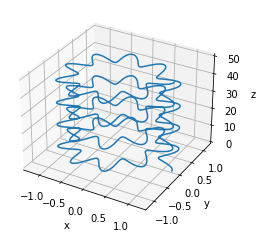

In [95]:
# Inicialización de la representación 3D
fig = plt.figure()
ax = plt.axes(projection="3d")
# Creación de los valores en donde se evalúan las funciones
tt = np.linspace(0., 8.*np.pi, 1000)
# Creación de los puntos de la curva
xx = (1+0.2*np.cos(10*tt))*np.cos(tt)
yy = (1+0.2*np.cos(10*tt))*np.sin(tt)
zz = 2*tt+0.2*np.sin(10*tt)
# Representación gráfica de la curva 3D
p = ax.plot3D(xx, yy, zz)
# Etiquetas de los ejes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

### Ejercicio 4
Representa una recta en $\mathbb{R}^2$.

In [41]:
# ESCRIBE AQUÍ TU CÓDIGO

### Ejercicio 5
Representa en el espacio una traza para cada una de las siguientes superficies:
- Un cilindro
- Una superficie cuádrica
- Una superficie de revolución

In [42]:
# ESCRIBE AQUÍ TU CÓDIGO

## Representación gráfica de superficies en el espacio tridimensional

Por simplicidad, nos centraremos en la representación gráfica de superficies de la forma $z=f(x,y)$. Este tipo de superficies se puede definir como un conjunto de puntos de la forma:
$
\{(x,y,f(x,y)):(x,y)\in\mathbb{R}^2\}\subset \mathbb{R}^3.
$
Como en la representación gráfica de curvas, las gráficas de superficies se crean a partir de un gran número de puntos de la superficie que resultan de evaluar la función en una nube de puntos en el plano $xy$. Por tanto, el primer paso será crear la nube de puntos con el comando `np.meshgrid` a partir de dos vectores que almacenan las componentes $x$ e $y$ de los puntos de la nube, y que se obtienen utilizando el comando `np.linspace`. Finalmente, se creará la gráfica tridimensional a través del comando `plot_surface`.

Por ejemplo, para representar el paraboloide elíptico 

$$
z=\dfrac{x^2}{2}+y^2\quad\text{con }(x,y)\in[-1,1]\times[-1,1],
$$ 
se utilizarían los comandos correspondientes como sigue:

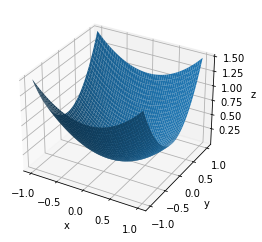

In [96]:
# Inicialización de la representación 3D
fig = plt.figure()
ax = plt.axes(projection="3d")
# Creación de la nube de puntos (50 puntos en cada eje, x e y) 
xx = np.linspace(-1, 1, 50)
yy = np.linspace(-1, 1, 50)
xx, yy = np.meshgrid(xx, yy)
zz = xx**2/2+yy**2
# Representación de la superficie
surf = ax.plot_surface(xx, yy, zz)
# Etiquetas de los ejes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

> **NOTA**: Si introducimos `f` como una función o expresión de **Sympy**, tendríamos previamente que convertirla en **Numpy** a través del método `sp.lambdify` para así poder evaluarla de forma vectorial en objetos pertenecientes al módulo **Numpy**, como lo son los elementos de la nube de puntos. 

A continuación, tenemos en cuenta esta observación para representar el cono de ecuación $x^2+y^2-z^2=0$:

[-sqrt(x**2 + y**2), sqrt(x**2 + y**2)]


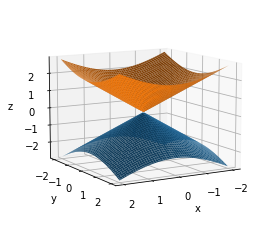

In [97]:
x, y, z = sp.symbols('x y z', real=True) # definimos las variables simbólicas x, y, z
z_exp = sp.solve(x**2+y**2-z**2,z) # despejamos z de la ecuación del cono  
print(z_exp) # obtenemos 2 expresiones
z_exp1= sp.lambdify((x,y),z_exp[0],"numpy") # función numpy con la primera expresión obtenida
z_exp2= sp.lambdify((x,y),z_exp[1],"numpy") # función numpy con la segunda expresión obtenida
# Inicialización de la representación 3D
fig = plt.figure()
ax = plt.axes(projection="3d")
# Creación de la nube de puntos con (x,y) en [-2,2]x[-2,2] (100 puntos en cada eje, x e y) 
xx = np.linspace(-2, 2, 100)
yy = np.linspace(-2, 2, 100)
xx, yy = np.meshgrid(xx, yy)
zz1 = z_exp1(xx,yy)
zz2 = z_exp2(xx,yy)
# Representación del cono
surf1 = ax.plot_surface(xx, yy, zz1) # parte de abajo 
surf2 = ax.plot_surface(xx, yy, zz2) # parte de arriba
# Etiquetas de los ejes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# Orientamos los ejes
ax.azim = 60
ax.elev = 10

plt.show()

### Ejercicio 6 
Representa gráficamente las siguientes superficies: 
- Un paraboloide hiperbólico
- Un hiperboloide de dos hojas

In [25]:
# ESCRIBE AQUÍ TU CÓDIGO